In [44]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

In [45]:
df = pd.read_csv('../Data/weather_forecast_data.csv')
display(df.head())

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [46]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


None

In [47]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.581725,7.326996,10.001842,16.359398,22.536448,28.976476,34.995214
Humidity,2500.0,64.347094,19.954739,30.005071,47.339815,63.920797,81.561021,99.997481
Wind_Speed,2500.0,9.906255,5.780316,0.009819,4.761909,9.908572,14.948408,19.999132
Cloud_Cover,2500.0,49.658104,29.123104,0.015038,23.900016,49.488284,75.324140,99.997795
Pressure,2500.0,1014.312336,20.196433,980.014486,996.938630,1013.433035,1031.735067,1049.985593


In [48]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [49]:
#Encoding categorical feature
df['Rain'] = df['Rain'].map({'no rain': 0, 'rain': 1})

#Getting all the numeric and categorical features
output_var = 'Rain'
numeric_data = df.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_data if col != output_var]
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numeric Features    : {numeric_features}')
print(f'Categorical Features: {categorical_features}')

Numeric Features    : ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
Categorical Features: []


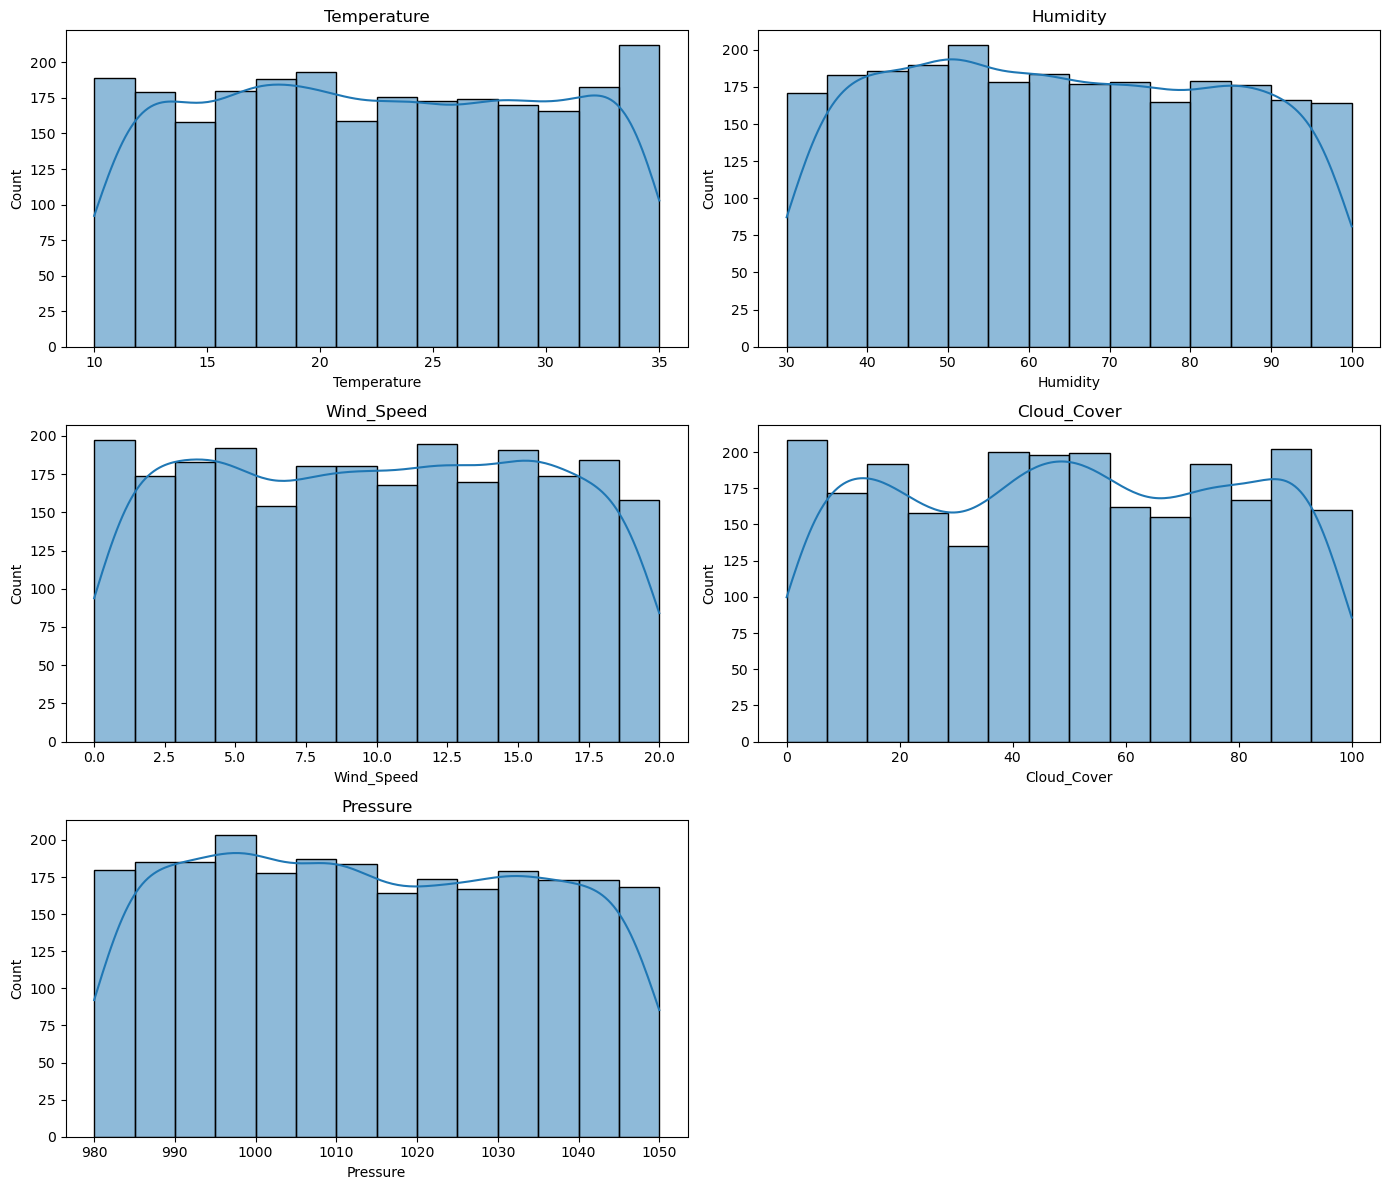

In [50]:
#Plotting raw numeric data
n_features = len(numeric_features)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))


plt.figure(figsize=(14, n_rows*4))
for i, col in enumerate(df[numeric_features].columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [51]:
#Data is relatively symmetrical (skewness ~ 0)
for col in numeric_features:
    skewness = skew(df[col])
    print(f"{col} skewness: {skewness:.2f}")

Temperature skewness: 0.01
Humidity skewness: 0.05
Wind_Speed skewness: 0.00
Cloud_Cover skewness: -0.01
Pressure skewness: 0.05


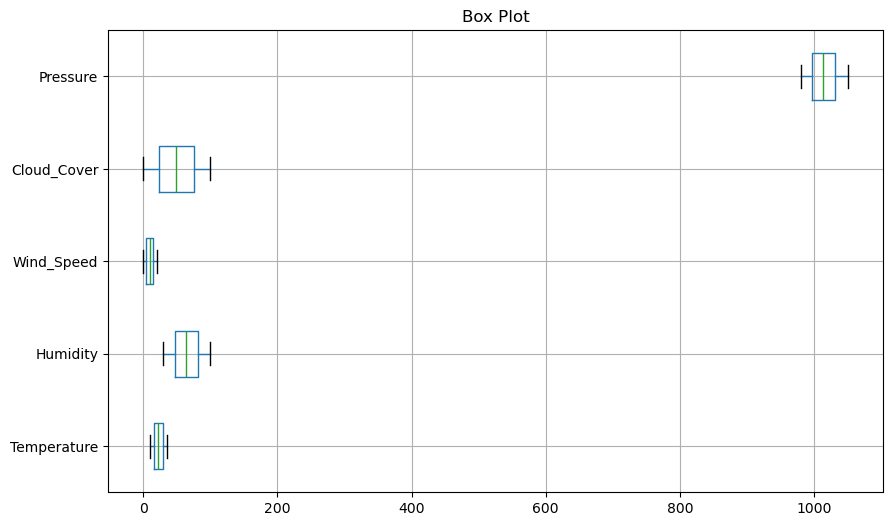

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[numeric_features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot')

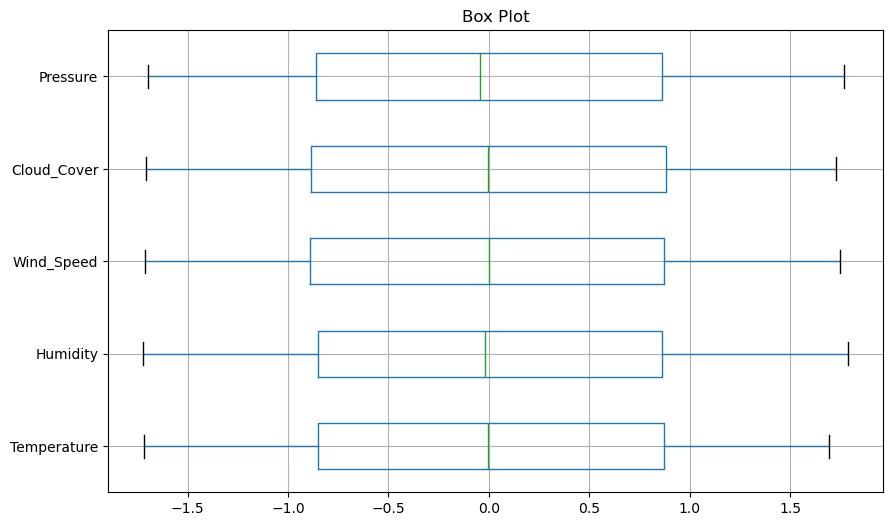

In [53]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_scaled[numeric_features].boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot')

In [54]:
#Outlier Removal
df_clean = df.copy()

# Loop through numeric features and apply IQR filtering
for col in numeric_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Data shape before outlier removal: {df.shape}")
print(f"Data shape after outlier removal: {df_clean.shape}")


Data shape before outlier removal: (2500, 6)
Data shape after outlier removal: (2500, 6)


In [55]:
df.to_csv('../Data/weather_cleaned.csv', index=False)